In [1]:
# ssh carnd@ip -L 4567:localhost:4567

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Fix error with TF and Keras
# import tensorflow as tf
# tf.python.control_flow_ops = tf

In [3]:
# df = pd.read_csv('./data/driving_log.csv', 
#                  names=['centre_image', 'left_image', 'right_image', 'steering_angle', 'throttle', 'break', 'speed'])
df = pd.read_csv('./data/driving_log.csv')
print(df.shape)
df.head(2)

(8036, 7)


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.14829
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.87963


In [4]:
# D:\SDCND\beta-simulator-windows\recording\IMG\center_2017_02_14_22_05_18_509.jpg

# df = df.replace(to_replace="D:\\\\SDCND\\\\beta-simulator-windows", value='.', regex=True).replace(to_replace='\\\\', value='/', regex=True)
df = df.replace(to_replace="IMG", value='./data/IMG', regex=True)
df.head(2)

,center,left,right,steering,throttle,brake,speed
0,./data/IMG/center_2016_12_01_13_30_48_287.jpg,./data/IMG/left_2016_12_01_13_30_48_287.jpg,./data/IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.14829
1,./data/IMG/center_2016_12_01_13_30_48_404.jpg,./data/IMG/left_2016_12_01_13_30_48_404.jpg,./data/IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.87963


./data/IMG/center_2016_12_01_13_31_14_295.jpg
(160, 320, 3)


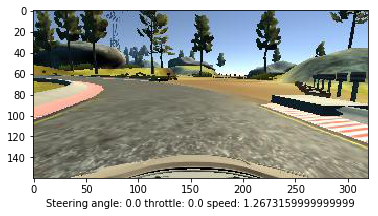

In [5]:
def show_image(index):
    print(df['center'][index])
    image = mpimg.imread(df['center'][index])
    print(image.shape)
    plt.imshow(image)
    plt.xlabel("Steering angle: {} throttle: {} speed: {}".format(df['steering'][index], df['throttle'][index], df['speed'][index]))

show_image(15)

(array([  4.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   2.10000000e+01,   8.00000000e+01,
          1.80000000e+02,   2.14000000e+02,   8.11000000e+02,
          4.95600000e+03,   6.93000000e+02,   7.12000000e+02,
          1.76000000e+02,   1.28000000e+02,   3.80000000e+01,
          6.00000000e+00,   5.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00]),
 array([-0.9426954 , -0.84556063, -0.74842586, -0.65129109, -0.55415632,
        -0.45702155, -0.35988678, -0.26275201, -0.16561724, -0.06848247,
         0.0286523 ,  0.12578707,  0.22292184,  0.32005661,  0.41719138,
         0.51432615,  0.61146092,  0.70859569,  0.80573046,  0.90286523,  1.        ]),
 <a list of 20 Patch objects>)

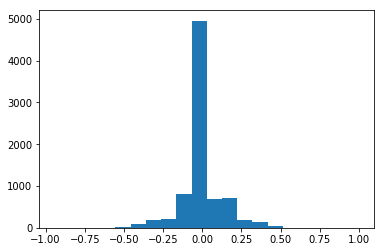

In [6]:
plt.hist(df['steering'], bins=20)

In [7]:
# plt.hist(df['throttle'])

# df2 = df[(df['steering'] != 0)]
df2 = df[(df['steering'] <= -0.05) | (df['steering'] >= 0.05)].reset_index(drop=True)

print(df2.shape)
print(df2['steering'][100])
df = df2



(3155, 7)
0.1765823


(array([   4.,    2.,    3.,    4.,   21.,   80.,  180.,  214.,  811.,
         213.,  555.,  712.,  176.,  128.,   38.,    6.,    5.,    1.,
           0.,    2.]),
 array([-0.9426954 , -0.84556063, -0.74842586, -0.65129109, -0.55415632,
        -0.45702155, -0.35988678, -0.26275201, -0.16561724, -0.06848247,
         0.0286523 ,  0.12578707,  0.22292184,  0.32005661,  0.41719138,
         0.51432615,  0.61146092,  0.70859569,  0.80573046,  0.90286523,  1.        ]),
 <a list of 20 Patch objects>)

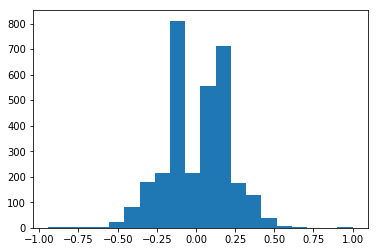

In [8]:
plt.hist(df['steering'], bins=20)

(3155, 160, 320, 3)
(3155, 1)
[[ 0.1574452]
 [ 0.1765823]
 [ 0.1765823]
 [-0.0787459]
 [-0.0787459]]


(array([   4.,    2.,    3.,    4.,   21.,   80.,  180.,  214.,  811.,
         213.,  555.,  712.,  176.,  128.,   38.,    6.,    5.,    1.,
           0.,    2.]),
 array([-0.9426954 , -0.84556063, -0.74842586, -0.65129109, -0.55415632,
        -0.45702155, -0.35988678, -0.26275201, -0.16561724, -0.06848247,
         0.0286523 ,  0.12578707,  0.22292184,  0.32005661,  0.41719138,
         0.51432615,  0.61146092,  0.70859569,  0.80573046,  0.90286523,  1.        ]),
 <a list of 20 Patch objects>)

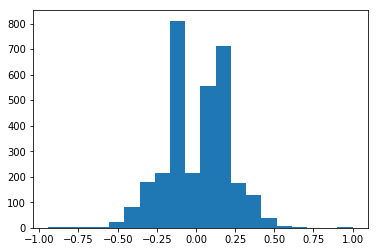

In [9]:
# get images and labels

def get_images(df):
    result = []
    for path in df['center']:
        img = mpimg.imread(path)
        result.append(img)
    return np.stack(result)

x = get_images(df)
print(x.shape)

y = df.as_matrix(columns=['steering'])
print(y.shape)
print(y[10:15])
plt.hist(y, bins=20)

In [10]:
# generate more data
df_flip_data = df[(df['steering'] <= -0.1) | (df['steering'] >= 0.1)].reset_index(drop=True)
# df_flip_data = df[(df['steering'] <= -0.1)].reset_index(drop=True)
print(df_flip_data.shape)
x_flip = get_images(df_flip_data)
y_flip = df_flip_data.as_matrix(columns=['steering'])

y_flip = -y_flip
# print(x_flip.shape)
x_flip = [np.fliplr(a) for a in x_flip]
# plt.imshow(x_flip[100])

x = np.append(x, x_flip, axis=0)
y = np.append(y, y_flip, axis=0)
print(x.shape)
print(y.shape)


(2113, 7)
(5268, 160, 320, 3)
(5268, 1)


(array([  6.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          1.10000000e+01,   2.30000000e+01,   1.04000000e+02,
          2.50000000e+02,   4.61000000e+02,   1.25400000e+03,
          5.95000000e+02,   4.47000000e+02,   1.25400000e+03,
          4.61000000e+02,   2.50000000e+02,   1.04000000e+02,
          2.30000000e+01,   1.10000000e+01,   3.00000000e+00,
          1.00000000e+00,   6.00000000e+00]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 20 Patch objects>)

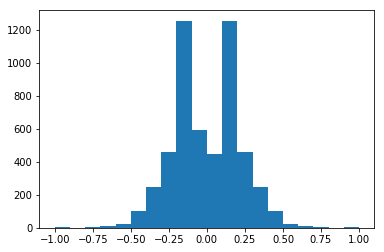

In [11]:
plt.hist(y, bins=20)

In [12]:
# TODO: Build a model
from keras.models import Sequential, Model
from keras.layers import Cropping2D, Lambda
from keras.layers.core import Activation, Dense, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.applications.vgg16 import VGG16

def traffic_sign_model():
    model = Sequential()
    model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((50,20), (0,0))))
    model.add(Convolution2D(32, 1, 1, border_mode='same'))
    model.add(Convolution2D(32, 3, 3, border_mode='same'))
    model.add(Convolution2D(32, 3, 3, border_mode='same'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2,2), border_mode='same'))
    model.add(Convolution2D(64, 3, 3, border_mode='same'))
    model.add(Convolution2D(64, 3, 3, border_mode='same'))
    model.add(Convolution2D(64, 3, 3, border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2,2), border_mode='same'))
    model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.compile('adam', 'mse')
    return model

def VGG():
    modelvgg = VGG16(include_top=False, weights=None, input_tensor=None, input_shape=(160,320,3))
#     model.summary()
    layer = Flatten(name='flatten')(modelvgg.layers[-1].output)
    layer = Dense(4096, activation='relu', name='dense1')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(4096, activation='relu', name='dense2')(layer)
    layer = Dropout(0.5)(layer)
    prediction = Dense(1)(layer)
    model = Model(modelvgg.input, prediction)
    model.compile('adam', 'mse')
    return model

model = VGG()


# model.add(Dense(1))
# model.compile('adam', 'mse')
# model.summary()


Using TensorFlow backend.


In [14]:
history = model.fit(x, y, batch_size=64, nb_epoch=5, validation_split=0.2)

Train on 4214 samples, validate on 1054 samples
Epoch 1/5
4214/4214 [==============================] - 302s - loss: 2110.8257 - val_loss: 0.0656

In [15]:
model.save('./model.h5')


In [ ]:
from keras.models import load_model
model = load_model('./model.h5')

In [ ]:
#0.00212548

index: 1480  actual:  [ 0.07132844]  prediction: [[-0.02426631]]
index: 2191  actual:  [-0.1736895]  prediction: [[-0.20652696]]
index: 3308  actual:  [-0.3583844]  prediction: [[-0.17570701]]
index: 2047  actual:  [-0.1547008]  prediction: [[-0.14801463]]


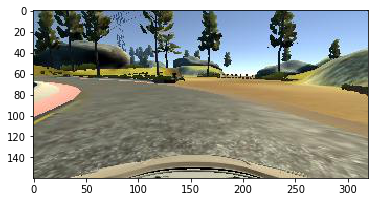

In [26]:
import random
for i in range(1, 5):
    test_index=random.randint(0, len(x))
#     print(test_index)
    test_image = x[test_index]
#     print(y[test_index])
    prediction = model.predict(test_image[None, :, :, :], batch_size=1)
    print("index:", test_index, " actual: ", y[test_index], " prediction:", prediction)


plt.imshow(test_image)

In [ ]:
result = model.evaluate(x, y, batch_size=128)

print(model.metrics_names)
print(result)

In [ ]:
# TODO: Load test data
with open('test.p', 'rb') as f:
    data = pickle.load(f)

# TODO: Load the feature data to the variable X_train
X_test = data['features']

# TODO: Load the label data to the variable y_train
y_test = data['labels']
    
# TODO: Preprocess data & one-hot encode the labels
X_test_normalized = normalize_grayscale(X_test)
y_test_one_hot = label_binarizer.fit_transform(y_test)

# TODO: Evaluate model on test data
result = model.evaluate(X_test_normalized, y_test_one_hot, batch_size=128)

print(model.metrics_names)
print(result)